<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Image-Recongnition-Case-with-NN-By-Tensorflow" data-toc-modified-id="Image-Recongnition-Case-with-NN-By-Tensorflow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Recongnition Case with NN By Tensorflow</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.Loading-data" data-toc-modified-id="1.Loading-data-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>1.Loading data</a></span></li></ul></li><li><span><a href="#2.Building-NN-Model" data-toc-modified-id="2.Building-NN-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>2.Building NN Model</a></span><ul class="toc-item"><li><span><a href="#2.1-Create-placeholders" data-toc-modified-id="2.1-Create-placeholders-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>2.1 Create placeholders</a></span></li><li><span><a href="#2.2-Initializing-the-parameters" data-toc-modified-id="2.2-Initializing-the-parameters-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>2.2 Initializing the parameters</a></span></li><li><span><a href="#2.3-Forward-propagation" data-toc-modified-id="2.3-Forward-propagation-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>2.3 Forward propagation</a></span></li><li><span><a href="#2.4-Compute-cost" data-toc-modified-id="2.4-Compute-cost-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>2.4 Compute cost</a></span></li><li><span><a href="#2.5-Building-model" data-toc-modified-id="2.5-Building-model-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>2.5 Building model</a></span></li><li><span><a href="#2.6-predict" data-toc-modified-id="2.6-predict-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>2.6 predict</a></span></li></ul></li></ul></li></ul></div>

# Image Recongnition Case with NN By Tensorflow
Refrence List
- Coursera course [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning) by Andrew Ng
- [An Introduction to Implementing Neural Networks using Tensorflow](https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/)

- Tensorflow is a low level library
- To define a neural network architecture, you should have fundamental knowledge of NN:
 - initialize parameter
 - forward propagation
 - compute cost
 - backward propagation
 - update parameter

In [56]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
import os
os.chdir(r"F:\Diverse\statistics\Python_data_analysis\Kaggle项目\20170926_MNIST\dataset")

%matplotlib inline
np.random.seed(1)

### 1.Loading data

In [7]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test = pd.read_csv("test.csv")

To reduce training time, I just pick up 15% example for fitting my model.

In [18]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [42]:
train_sample = train.sample(frac=0.15)
X_train_flatten = train_sample.iloc[:,1:].values.T
Y_train_onehot = convert_to_one_hot(train_sample.iloc[:,0].values,10)
X_test_flatten = test.values.T

In [45]:
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train_flatten.T, Y_train_onehot.T, random_state=42)

In [46]:
X_train = X_train.T/255
X_dev = X_dev.T/255
Y_train = Y_train.T
Y_dev = Y_dev.T
X_test = X_test_flatten/255

In [47]:
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of dev examples = " + str(X_dev.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(Y_dev.shape))
print ("X_test shape: " + str(X_test.shape))

number of training examples = 4725
number of dev examples = 1575
number of test examples = 28000
X_train shape: (784, 4725)
Y_train shape: (10, 4725)
X_dev shape: (784, 1575)
Y_dev shape: (10, 1575)
X_test shape: (784, 28000)


## 2.Building NN Model

### 2.1 Create placeholders

Create placeholders for `X` and `Y`. This will allow you to later pass your training data in when you run your session. 

In [35]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape=[n_x, None], name="X")
    Y = tf.placeholder(tf.float32, shape=[n_y, None], name="Y")
    return X, Y

### 2.2 Initializing the parameters

- Xavier Initialization for weights 
- Zero Initialization for biases

In [53]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", shape=[25,784], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", shape=[25,1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [10,12], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3",[10,1], initializer=tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

### 2.3 Forward propagation

In [37]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2),b3)
    
    return Z3

### 2.4 Compute cost

It is important to know that the "`logits`" and "`labels`" inputs of `tf.nn.softmax_cross_entropy_with_logits` are expected to be of shape (number of examples, num_classes).

In [39]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=labels))
    return cost

### 2.5 Building model

The programming frameworks can compute Backward propagation & parameter updates in 1 line of code.

In [41]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
      
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [61]:
def model(X_train, Y_trian, X_dev, Y_dev, learning_rate=0.0001,
         num_epochs=1000, minibatch_size=32, print_cost=True):
    
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed=3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            epoch_cost = 0
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches
                
            if print_cost == True and epoch % 100 == 0:
                print("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel("cost")
        plt.xlabel("iterations (per tens)")
        plt.title("Learning rate = " + str(learning_rate))
        plt.show()
            
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
            
            # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
            
            # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_dev, Y: Y_dev}))
        
        return parameters

Cost after epoch 0: 2.225445
Cost after epoch 100: 0.128159
Cost after epoch 200: 0.032146
Cost after epoch 300: 0.004843
Cost after epoch 400: 0.000410
Cost after epoch 500: 0.000019
Cost after epoch 600: 0.000001
Cost after epoch 700: 0.000000
Cost after epoch 800: 0.000000
Cost after epoch 900: 0.000000


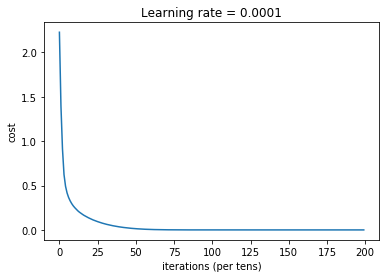

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.92254


In [62]:
parameter = model(X_train, Y_train, X_dev, Y_dev)

### 2.6 predict

In [68]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", X.shape)
    
    z3 = forward_propagation(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

In [69]:
prediction = predict(X_test, parameter)

In [74]:
X_test.shape

(784, 28000)

In [75]:
def show_pred(index=None,pred=prediction):
    img=X_test[:,index].reshape(28,28)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title("prediction_result: "+str(pred[index]))
    plt.show()

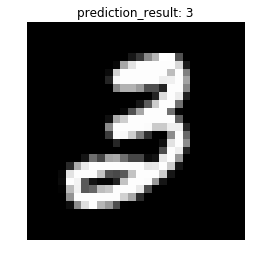

In [80]:
show_pred(index=235)

In [82]:
submissions = pd.DataFrame({"ImageId":list(range(1,len(prediction)+1)),
                           "Label":prediction})
submissions.to_csv("DR.csv", index=False, header=True)